## 1. Data Preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/model_churn_csv.csv")
df.head()


,CustomerID,TotalLogins,TotalDays,ratio,WatchTimeMinutes,AgeGroup,SubscriptionPlan,ContentPreference,Churn
0,CUST001,30,52,0.576923,1114,36-50,Basic,Sports,1
1,CUST002,46,91,0.505495,1635,26-35,Basic,Documentaries,0
2,CUST003,42,91,0.461538,1393,36-50,Basic,Movies,0
3,CUST004,68,91,0.747253,5328,51+,Standard,Sports,0
4,CUST005,65,91,0.714286,8123,18-25,Premium,Documentaries,0


In [3]:
df = df.drop(columns="CustomerID")

In [4]:
df = df.drop(columns=["TotalLogins" , "TotalDays"])

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["SubscriptionPlan"] = le.fit_transform(df["SubscriptionPlan"])
df["AgeGroup"] = le.fit_transform(df["AgeGroup"])
df["ContentPreference"] = le.fit_transform(df["ContentPreference"])

In [6]:
df['WatchTimeMinutes_standardized'] = (df['WatchTimeMinutes'] - df['WatchTimeMinutes'].mean()) / df['WatchTimeMinutes'].std()


In [7]:
df = df.drop(columns="WatchTimeMinutes")
df.head()

,ratio,AgeGroup,SubscriptionPlan,ContentPreference,Churn,WatchTimeMinutes_standardized
0,0.576923,2,0,2,1,-1.125229
1,0.505495,1,0,0,0,-0.898788
2,0.461538,2,0,1,0,-1.003968
3,0.747253,3,2,2,0,0.706290
4,0.714286,0,1,0,0,1.921073


In [8]:
print(df["AgeGroup"].unique())
print(df["SubscriptionPlan"].unique())
print(df["Churn"].unique())

[2 1 3 0]
[0 2 1]
[1 0]


In [9]:
df.describe()

,ratio,AgeGroup,SubscriptionPlan,ContentPreference,Churn,WatchTimeMinutes_standardized
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,0.618099,1.260000,0.968000,1.332000,0.180000,-9.237056e-17
std,0.106231,1.025968,0.895648,1.114786,0.384958,1.000000e+00
min,0.351648,0.000000,0.000000,0.000000,0.000000,-1.461630e+00
25%,0.521868,0.000000,0.000000,0.000000,0.000000,-9.104145e-01
50%,0.637363,1.000000,1.000000,1.000000,0.000000,1.006371e-01
75%,0.714286,2.000000,2.000000,2.000000,0.000000,5.923091e-01
max,0.814815,3.000000,2.000000,3.000000,1.000000,2.178807e+00


In [10]:
df.head()

,ratio,AgeGroup,SubscriptionPlan,ContentPreference,Churn,WatchTimeMinutes_standardized
0,0.576923,2,0,2,1,-1.125229
1,0.505495,1,0,0,0,-0.898788
2,0.461538,2,0,1,0,-1.003968
3,0.747253,3,2,2,0,0.706290
4,0.714286,0,1,0,0,1.921073


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ratio                          250 non-null    float64
 1   AgeGroup                       250 non-null    int64  
 2   SubscriptionPlan               250 non-null    int64  
 3   ContentPreference              250 non-null    int64  
 4   Churn                          250 non-null    int64  
 5   WatchTimeMinutes_standardized  250 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 11.8 KB


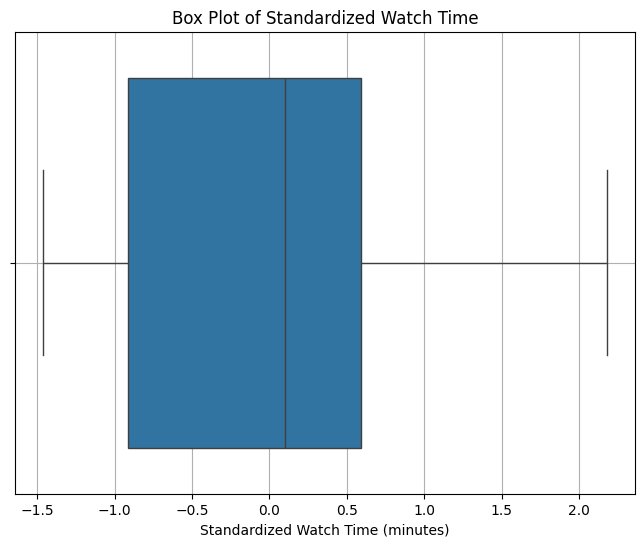

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# If you don't have a dataframe, you can create a sample one like this:
# np.random.seed(0)
# data = {'WatchTimeMinutes_standardized': np.random.randn(100)}
# df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['WatchTimeMinutes_standardized'])

# Add a title and labels for clarity
plt.title('Box Plot of Standardized Watch Time')
plt.xlabel('Standardized Watch Time (minutes)')

# Add a grid for better readability
plt.grid(True)

# Save the plot to a file
plt.savefig('boxplot.png')

##DL NN ##

In [13]:
# x = df.drop(columns="Churn")
# y = df[["Churn"]]

In [14]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout

# model = Sequential()

# # Input layer with 64 neurons and ReLU activation
# model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
# # Hidden layer
# model.add(Dense(32, activation='relu'))
# # Output layer for binary classification
# model.add(Dense(1, activation='sigmoid'))
# model.summary()


In [15]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [16]:
# import matplotlib.pyplot as plt

# # Now plot
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# epochs = range(1, len(acc) + 1)
# print(acc)
# print(val_acc)
# plt.figure(figsize=(8, 5))
# plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
# plt.title('Training vs Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [17]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.figure(figsize=(8, 5))
# plt.plot(epochs, loss, 'bo-', label='Training Loss')
# plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
# plt.title('Training vs Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()



In [18]:
df.head()

,ratio,AgeGroup,SubscriptionPlan,ContentPreference,Churn,WatchTimeMinutes_standardized
0,0.576923,2,0,2,1,-1.125229
1,0.505495,1,0,0,0,-0.898788
2,0.461538,2,0,1,0,-1.003968
3,0.747253,3,2,2,0,0.706290
4,0.714286,0,1,0,0,1.921073


## 2. Correlations##

In [19]:
correlations = df.corr()['Churn'][:-1]  # exclude correlation of Churned with itself
print(correlations)



ratio                0.038460
AgeGroup             0.064061
SubscriptionPlan    -0.088059
ContentPreference   -0.027513
Churn                1.000000
Name: Churn, dtype: float64


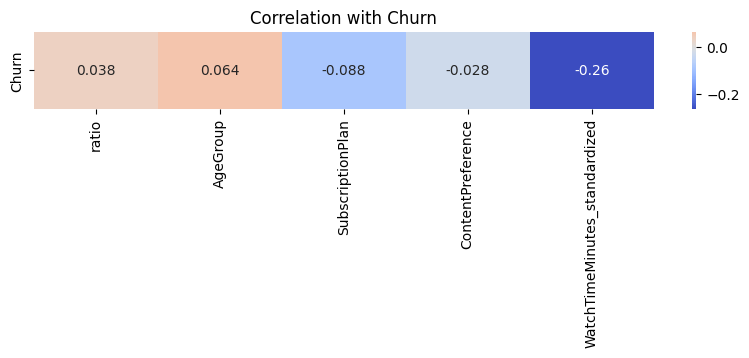

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations of all columns with 'Churn'
correlations = df.corr()['Churn'].drop('Churn')  # drops the Churn-to-Churn correlation

# Convert to DataFrame for heatmap plotting
corr_df = correlations.to_frame().T  # makes it a 1-row DataFrame

# Plot heatmap
plt.figure(figsize=(10, 1))  # horizontal bar style
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation with Churn")
plt.show()



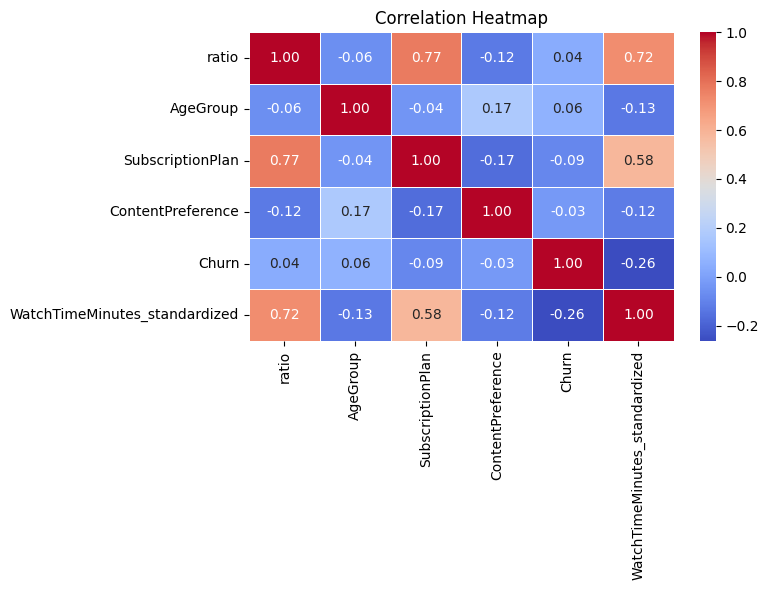

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


##3. Logistic Regression##

**Logistic Regression**


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and Target
X = df[['SubscriptionPlan', 'AgeGroup', 'ratio', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Initialization and Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.84

Confusion Matrix:
 [[41  0]
 [ 8  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        41
           1       1.00      0.11      0.20         9

    accuracy                           0.84        50
   macro avg       0.92      0.56      0.56        50
weighted avg       0.87      0.84      0.78        50



**logistic regression without ratio**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and Target
X = df[['SubscriptionPlan', 'AgeGroup', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Initialization and Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84

Confusion Matrix:
 [[41  0]
 [ 8  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        41
           1       1.00      0.11      0.20         9

    accuracy                           0.84        50
   macro avg       0.92      0.56      0.56        50
weighted avg       0.87      0.84      0.78        50



##4. Decsion Tree##

**Decision Tree**

Accuracy: 0.96

Confusion Matrix:
 [[41  0]
 [ 2  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.78      0.88         9

    accuracy                           0.96        50
   macro avg       0.98      0.89      0.93        50
weighted avg       0.96      0.96      0.96        50



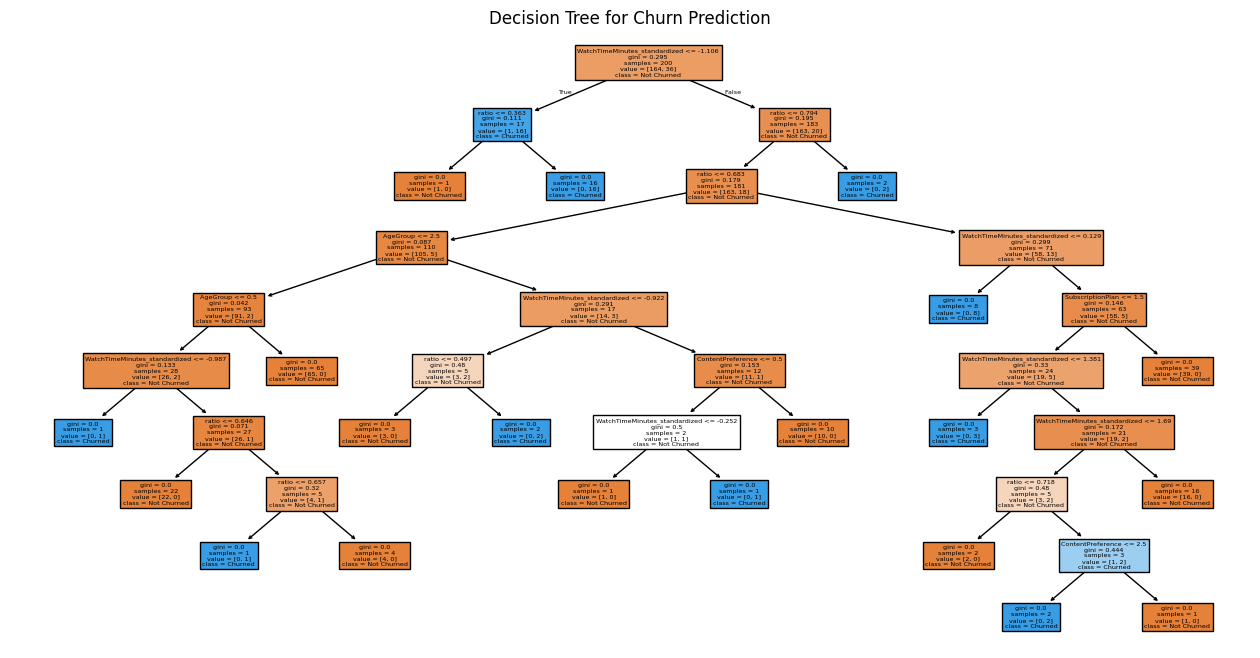

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Features and Target
X = df[['SubscriptionPlan', 'AgeGroup', 'ratio', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Plot the decision tree (simple version)
plt.figure(figsize=(16, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True)
plt.title("Decision Tree for Churn Prediction")
plt.show()


**Decision Tree without ratio**

Accuracy: 0.88

Confusion Matrix:
 [[40  1]
 [ 5  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.80      0.44      0.57         9

    accuracy                           0.88        50
   macro avg       0.84      0.71      0.75        50
weighted avg       0.87      0.88      0.87        50



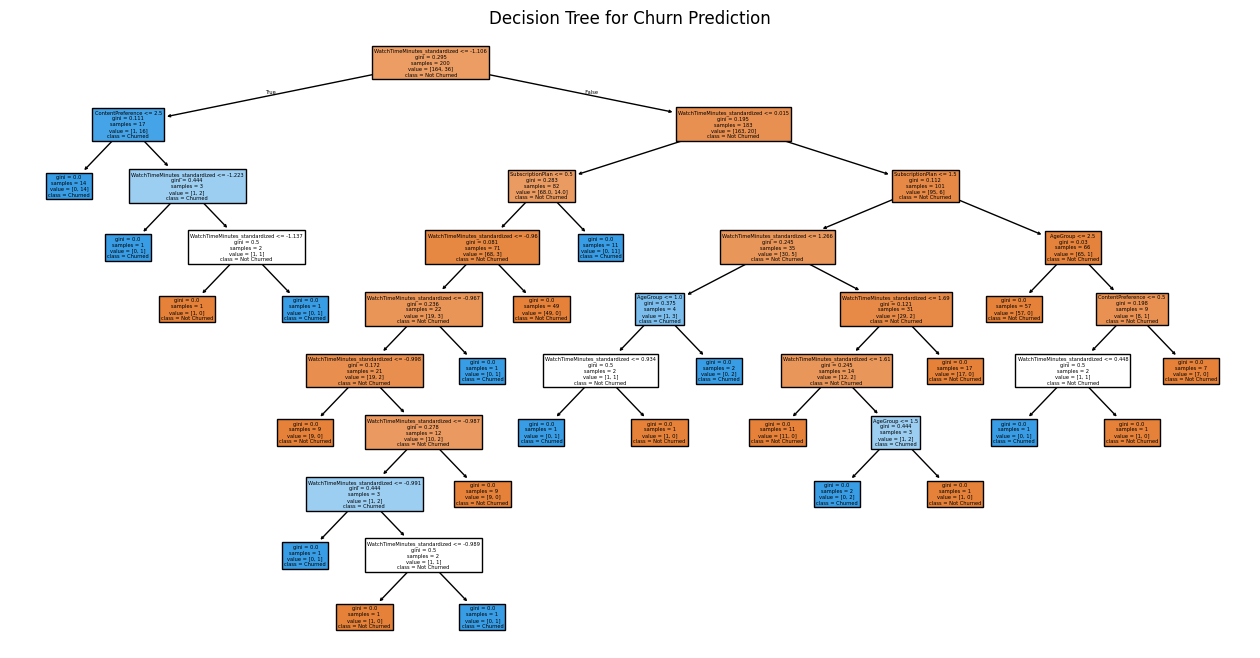

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Features and Target
X = df[['SubscriptionPlan', 'AgeGroup', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Plot the decision tree (simple version)
plt.figure(figsize=(16, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True)
plt.title("Decision Tree for Churn Prediction")
plt.show()

In [34]:
# Example of testing different max_depth values
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

for depth in [3, 4, 5, 6, 7, 8]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"Max Depth: {depth}, F1-Score (Churn): {f1:.4f}")

Max Depth: 3, F1-Score (Churn): 0.6154
Max Depth: 4, F1-Score (Churn): 0.6154
Max Depth: 5, F1-Score (Churn): 0.6154
Max Depth: 6, F1-Score (Churn): 0.8000
Max Depth: 7, F1-Score (Churn): 0.8000
Max Depth: 8, F1-Score (Churn): 0.8000


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the combination of parameters you want to test
param_grid = {
    'n_estimators': [100, 150],             # Number of trees in the forest
    'max_depth': [6, 8, 10, None],          # Max depth of the trees
    'min_samples_leaf': [1, 2, 4],          # Min samples required at a leaf node
    'class_weight': ['balanced']            # Handles class imbalance
}

# Set up the grid search to maximize the F1-score for the churn class
# cv=5 means it will use 5-fold cross-validation for more reliable results
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # We care most about the F1 score for the positive class
    cv=5,          # Using 5-fold cross-validation
    n_jobs=-1      # Use all available CPU cores
)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1-score found
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated F1-Score: {grid_search.best_score_:.4f}")

# You can now use the best model found for predictions
best_rf_model = grid_search.best_estimator_

Best Parameters: {'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 100}
Best Cross-Validated F1-Score: 0.8092


##5. Random Forest##

**Random forest**

✅ Accuracy: 0.92

📊 Confusion Matrix:
 [[41  0]
 [ 4  5]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.56      0.71         9

    accuracy                           0.92        50
   macro avg       0.96      0.78      0.83        50
weighted avg       0.93      0.92      0.91        50



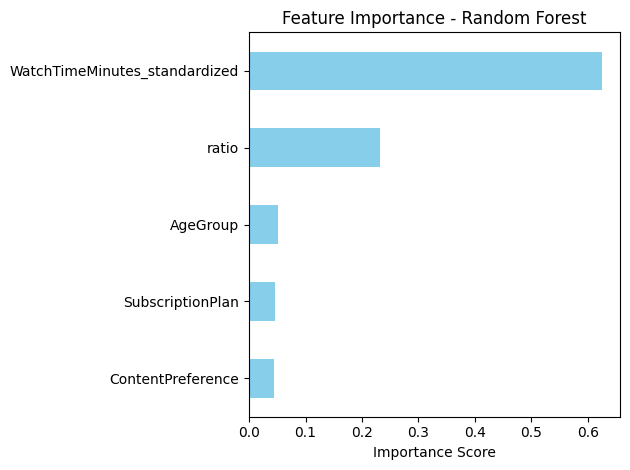

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Features and target variable
X = df[['SubscriptionPlan', 'AgeGroup', 'ratio', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


**Random Forest without ratio**

✅ Accuracy: 0.92

📊 Confusion Matrix:
 [[41  0]
 [ 4  5]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.56      0.71         9

    accuracy                           0.92        50
   macro avg       0.96      0.78      0.83        50
weighted avg       0.93      0.92      0.91        50



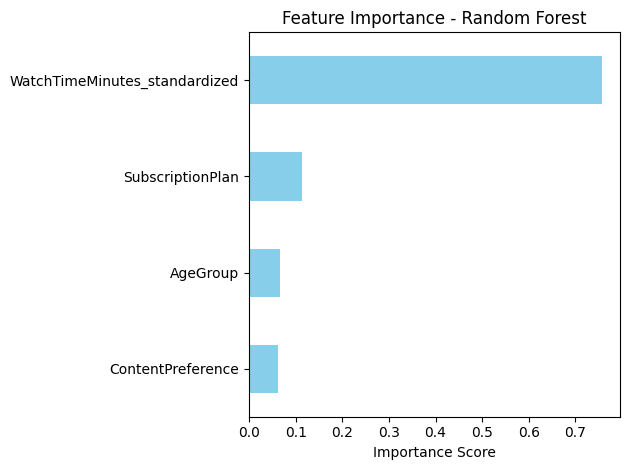

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Features and target variable
X = df[['SubscriptionPlan', 'AgeGroup', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

##6. XG Boost##

**XG Boost**

✅ Accuracy: 0.92
📊 Confusion Matrix:
 [[41  0]
 [ 4  5]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.56      0.71         9

    accuracy                           0.92        50
   macro avg       0.96      0.78      0.83        50
weighted avg       0.93      0.92      0.91        50



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:26:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


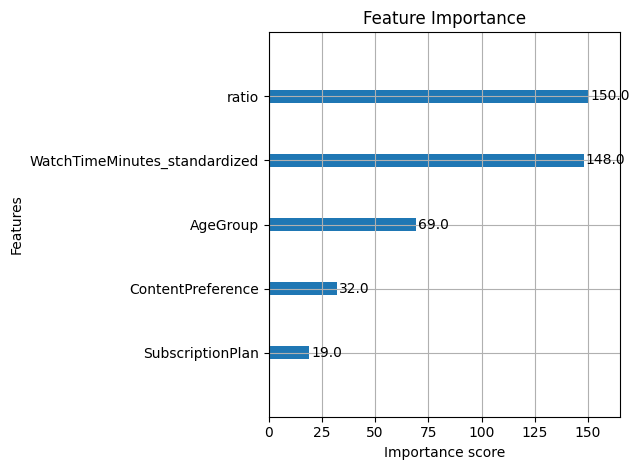


🔧 After Threshold Adjustment (0.14):
✅ Accuracy: 0.94
📊 Confusion Matrix:
 [[41  0]
 [ 3  6]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.67      0.80         9

    accuracy                           0.94        50
   macro avg       0.97      0.83      0.88        50
weighted avg       0.94      0.94      0.94        50



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------
# Step 1: Load your data
# ----------------------------
# Assuming df is already preprocessed and available
# Your final feature set
X = df[['SubscriptionPlan', 'AgeGroup', 'ratio', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# ----------------------------
# Step 2: Split data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------
# Step 3: Handle class imbalance
# ----------------------------
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()

# ----------------------------
# Step 4: Train XGBoost model
# ----------------------------
model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# ----------------------------
# Step 5: Evaluate the model
# ----------------------------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------
# Step 6 (Optional): Feature Importance
# ----------------------------
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 7 (Optional): Adjust Threshold
# ----------------------------
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_pred_proba >= 0.14).astype(int)  # Try lowering from 0.5

print("\n🔧 After Threshold Adjustment (0.14):")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("📈 Classification Report:\n", classification_report(y_test, y_pred_thresh))


**without ratio XG Boost**



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:26:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.88
📊 Confusion Matrix:
 [[39  2]
 [ 4  5]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.71      0.56      0.62         9

    accuracy                           0.88        50
   macro avg       0.81      0.75      0.78        50
weighted avg       0.87      0.88      0.87        50



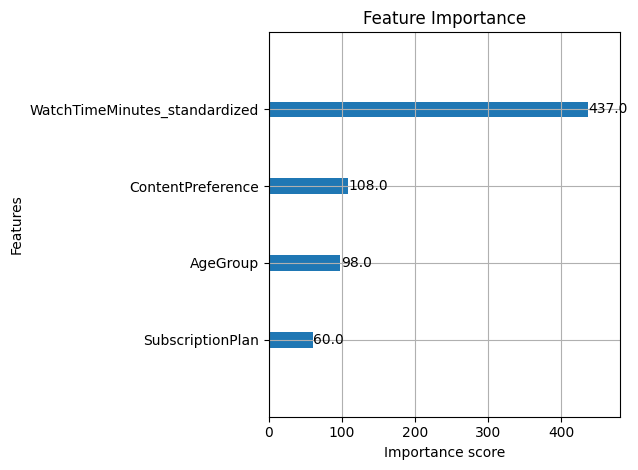


🔧 After Threshold Adjustment (0.14):
✅ Accuracy: 0.9
📊 Confusion Matrix:
 [[38  3]
 [ 2  7]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.70      0.78      0.74         9

    accuracy                           0.90        50
   macro avg       0.82      0.85      0.84        50
weighted avg       0.90      0.90      0.90        50



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------
# Step 1: Load your data
# ----------------------------
# Assuming df is already preprocessed and available
# Your final feature set
X = df[['SubscriptionPlan', 'AgeGroup', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# ----------------------------
# Step 2: Split data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------
# Step 3: Handle class imbalance
# ----------------------------
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()

# ----------------------------
# Step 4: Train XGBoost model
# ----------------------------
model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# ----------------------------
# Step 5: Evaluate the model
# ----------------------------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 Classification Report:\n", classification_report(y_test, y_pred))

# ----------------------------
# Step 6 (Optional): Feature Importance
# ----------------------------
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 7 (Optional): Adjust Threshold
# ----------------------------
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_pred_proba >= 0.14).astype(int)  # Try lowering from 0.5

print("\n🔧 After Threshold Adjustment (0.14):")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("📈 Classification Report:\n", classification_report(y_test, y_pred_thresh))


##hyper-parameter tuning ##

**hyper parameter tuning**

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:26:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Threshold: 0.14
🏆 Best F1-score: 0.8000

📊 Final Confusion Matrix:
[[41  0]
 [ 3  6]]

📈 Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.67      0.80         9

    accuracy                           0.94        50
   macro avg       0.97      0.83      0.88        50
weighted avg       0.94      0.94      0.94        50



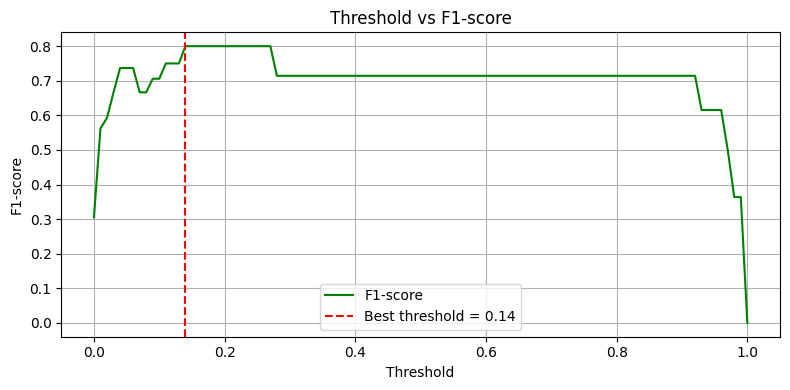

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ----------------------------
# Step 1: Load & Prepare Data
# ----------------------------
# Assuming df is already defined
X = df[['SubscriptionPlan', 'AgeGroup', 'ratio', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------
# Step 2: Handle Imbalance
# ----------------------------
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()

# ----------------------------
# Step 3: Train XGBoost
# ----------------------------
model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# ----------------------------
# Step 4: Get Probabilities
# ----------------------------
y_proba = model.predict_proba(X_test)[:, 1]

# ----------------------------
# Step 5: Threshold Tuning
# ----------------------------
thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    score = f1_score(y_test, y_pred_thresh)
    scores.append(score)

# Find best threshold
best_thresh = thresholds[np.argmax(scores)]
best_score = max(scores)

print(f"✅ Best Threshold: {best_thresh:.2f}")
print(f"🏆 Best F1-score: {best_score:.4f}")

# ----------------------------
# Step 6: Final Evaluation
# ----------------------------
y_pred_final = (y_proba >= best_thresh).astype(int)

print("\n📊 Final Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_final))

# ----------------------------
# Step 7: Plot F1 vs Threshold
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(thresholds, scores, label='F1-score', color='green')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best threshold = {best_thresh:.2f}')
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("Threshold vs F1-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##7. SMOTE##

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# --- This code assumes your DataFrame 'df' is already preprocessed ---

# 1. Define your features and target variable
X = df[['SubscriptionPlan', 'AgeGroup', 'ratio', 'WatchTimeMinutes_standardized', 'ContentPreference']]
y = df['Churn']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Initialize and train the XGBoost model on the balanced data
# Note: We don't need scale_pos_weight here because SMOTE has already balanced the data.
model_xgb_smote = xgb.XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model_xgb_smote.fit(X_train_smote, y_train_smote)

# 5. Make predictions and evaluate on the original test set
y_pred = model_xgb_smote.predict(X_test)

# --- Results ---
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=2))

✅ Accuracy: 0.92

📊 Confusion Matrix:
 [[41  0]
 [ 4  5]]

📈 Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.56      0.71         9

    accuracy                           0.92        50
   macro avg       0.96      0.78      0.83        50
weighted avg       0.93      0.92      0.91        50



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
